# 2019 IMFS Data Science Competition - Netflix for Bonds
## Week1 Materials - Data Preparation and Visualization

Welcome to the 2019 IMFS Competition! In this data preparation and visulization notebook, you will:

- Load the data into the notebook
- Save the data for next time usage
- Preprocessing the data
- Visualize the data



**After this assignment you will be able to:**

- Load the data into models

- Observe the data in 2D image

We assume here that you have read the comeptition rules. If you have not, please go back to https://github.com/fintechsteve/imfs-datascience-comp/tree/master/Summer2019

## 1.0 - Import packages and Load the Data

In this section you will import the necessary modules and packages you may need to use in the competition and load the data. The definition of modules and packages is here: https://www.learnpython.org/en/Modules_and_Packages

Please feel free to import and use any modules and packages you think may help you in this competition.

In [13]:
import pandas as pd
import numpy as np
from os.path import join
from os import listdir, getcwd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
import pickle
from datetime import datetime
from sklearn.decomposition import PCA



## 1.1 - Load the Data

We prepared the data in a pickle file and it can be loaded from the code below, Please note: due to the limitation of uploding file size in github, if you want to run it locally on your laptop, you need to download the data "dataset_merge.pkl" from Kaggle page.

In [14]:
training_data= pickle.load(open("dataset_merge.pkl", "rb" ))

## 2.0  Visualization

After proprocessing the data, we want to see what data looks like and if there is any clusters for different Cusips. We average the same cusip data here and use PCA to do reduce the dataset to 2D dataset and display it. There are many other ways to visualize it and can potentially help you understand the data better, please feel free to try yourself.

## 2.1 - Groupby Cusip and Scale the Data

We use the groupby function to groupby the dataset by 'Cusips' attribute we created above, and we take the average of the groupby to better visualize it, after groupby and average, we fill the NA and scale the data, this resource may help you to understand better where when and why we scale the data: https://www.geeksforgeeks.org/python-how-and-where-to-apply-feature-scaling/



In [19]:
# get the average stats for each cusip, you can group by different attribute to see different visualization
ave_df = training_data.groupby('Cpn').mean()
# fill the na, there are many different ways to fill na, 
# you can try different one to see how does them affect your result
ave_df = ave_df.fillna(ave_df.mean())
# we are doing a  StandardScaler here, similarly, there are different ways to scale data
# please feel free to try other methods
train_x = StandardScaler().fit_transform(ave_df)

## 2.2 - PCA

PCA is one of the most popular methods to reduce the dimension in the dataset, the reason we want to reduce dimensions here is we want to reduce the dimensions to 2D so human can understand the visulization.



In [20]:
# apply pca to dataset
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train_x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [21]:
# we can have a look at the dataset now
principalDf.head(5)

,principal component 1,principal component 2
0,-5.262594,1.031182
1,-5.813801,1.661013
2,-5.796228,1.953139
3,-4.858668,0.528777
4,-4.924218,0.788218


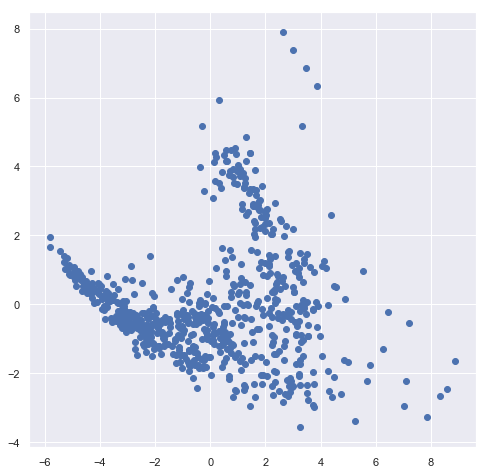

In [22]:
# plot the dataset here
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
x1 = principalDf['principal component 1']
x2 = principalDf['principal component 2']
ax.scatter(x1, x2)